##Lineair Regression#

Correlation with Price (Houses):
                      price
price              1.000000
total_area_sqm     0.439735
nbr_bedrooms       0.355635
construction_year  0.328429
fl_terrace         0.127982
fl_double_glazing  0.096656
fl_furnished       0.009284

Correlation with Price (Apartments):
                      price
price              1.000000
total_area_sqm     0.443015
nbr_bedrooms       0.393771
construction_year  0.250050
fl_terrace         0.199013
fl_double_glazing  0.015265
fl_furnished      -0.004225

Evaluating House Model with Core Features

House Model Performance:
Training R-squared Score: 0.33302018
Testing R-squared Score: 0.37695553


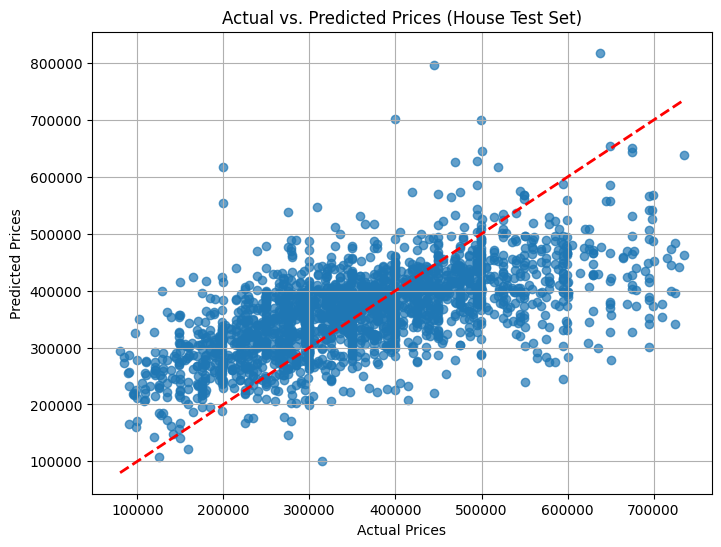


Evaluating Apartment Model with Core Features

Apartment Model Performance:
Training R-squared Score: 0.28803900
Testing R-squared Score: 0.28844161


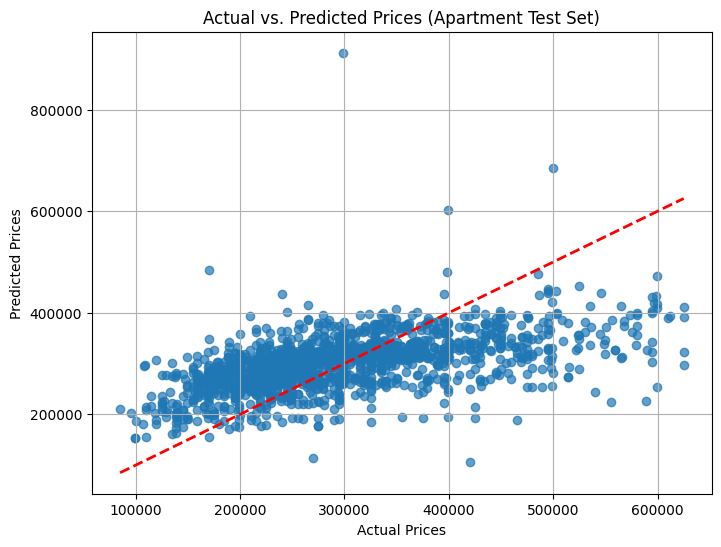

(0.28803899553169166, 0.2884416062555568)

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load datasets (replace with your specific file paths)
houses_data = pd.read_csv('houses_sqm.csv')
apartments_data = pd.read_csv('apartments_sqm.csv')


# Define core features for correlation and model analysis
core_features = ["price", "total_area_sqm", "construction_year", "nbr_bedrooms", "fl_furnished", 
                 "fl_terrace", "fl_double_glazing"]

# Filter data to keep only the core features and drop rows with missing values
houses_core = houses_data[core_features].dropna()
apartments_core = apartments_data[core_features].dropna()

# Calculate correlation matrices
houses_corr = houses_core.corr()
apartments_corr = apartments_core.corr()

# Extract correlations with `price` for easy interpretation
houses_price_corr = houses_corr[['price']].sort_values(by='price', ascending=False)
apartments_price_corr = apartments_corr[['price']].sort_values(by='price', ascending=False)

# Display correlation results to identify strong predictors
print("Correlation with Price (Houses):")
print(houses_price_corr)
print("\nCorrelation with Price (Apartments):")
print(apartments_price_corr)

# Define the final features based on correlation analysis (excluding `zip_code` for simplicity)
selected_features = ["total_area_sqm", "construction_year", "nbr_bedrooms", "fl_furnished", 
                     "fl_terrace", "fl_double_glazing"]

# Function to preprocess data
def preprocess_data(data, selected_features):
    return data[selected_features + ['price']].dropna()

# Preprocess datasets for model training
houses_data_cleaned = preprocess_data(houses_data, selected_features)
apartments_data_cleaned = preprocess_data(apartments_data, selected_features)

# Function to train and evaluate the model
def train_and_evaluate_model(data, features, target='price', model_type='Property'):
    if data.empty:
        print(f"No data available for {model_type.lower()}s.")
        return None, None
    
    # Separate features and target variable
    X = data[features]
    y = data[target]
    
    # Split data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the linear regression model
    regressor = LinearRegression(fit_intercept=True, n_jobs=-1)
    
    # Train the model on the training set
    regressor.fit(X_train, y_train)
    
    # Calculate R-squared scores for training and testing sets
    train_score = regressor.score(X_train, y_train)
    test_score = regressor.score(X_test, y_test)
    
    # Print model performance
    print(f"\n{model_type} Model Performance:")
    print(f"Training R-squared Score: {train_score:.8f}")
    print(f"Testing R-squared Score: {test_score:.8f}")
    
    # Plot actual vs. predicted values for the test set
    y_test_pred = regressor.predict(X_test)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Ideal line
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs. Predicted Prices ({model_type} Test Set)')
    plt.grid(True)
    plt.show()
    
    return train_score, test_score

# Train and evaluate models for both houses and apartments
print("\nEvaluating House Model with Core Features")
train_and_evaluate_model(houses_data_cleaned, selected_features, model_type="House")

print("\nEvaluating Apartment Model with Core Features")
train_and_evaluate_model(apartments_data_cleaned, selected_features, model_type="Apartment")


In [ ]:
##Correlation Matrix

Correlation Matrix for Houses


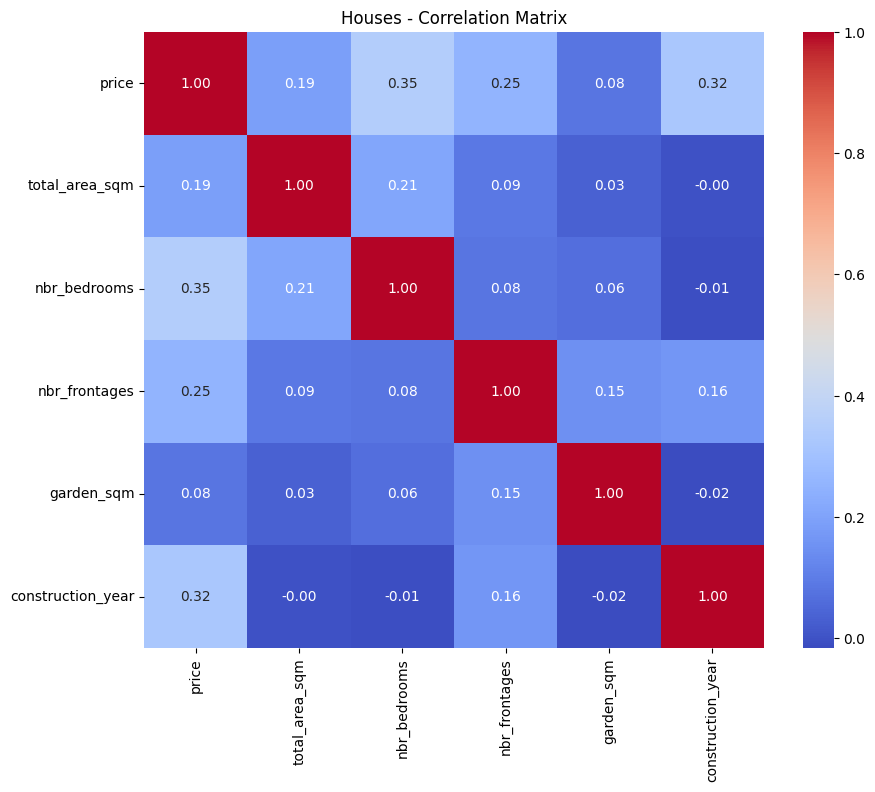

Correlation Matrix for Apartments


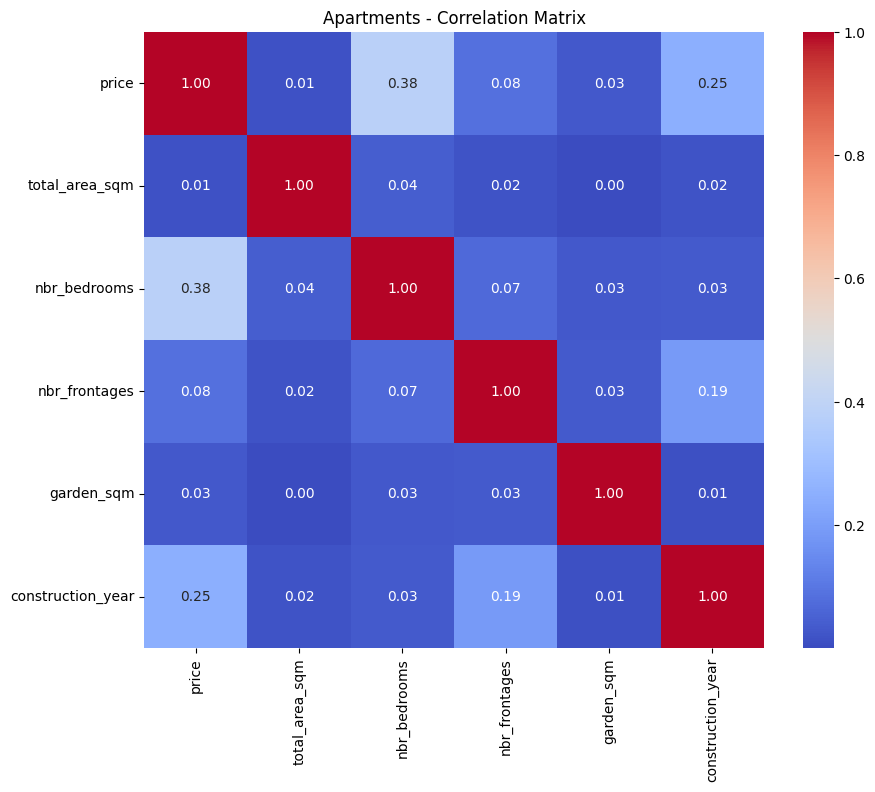


Scatter Plots for Houses - High Correlation Features


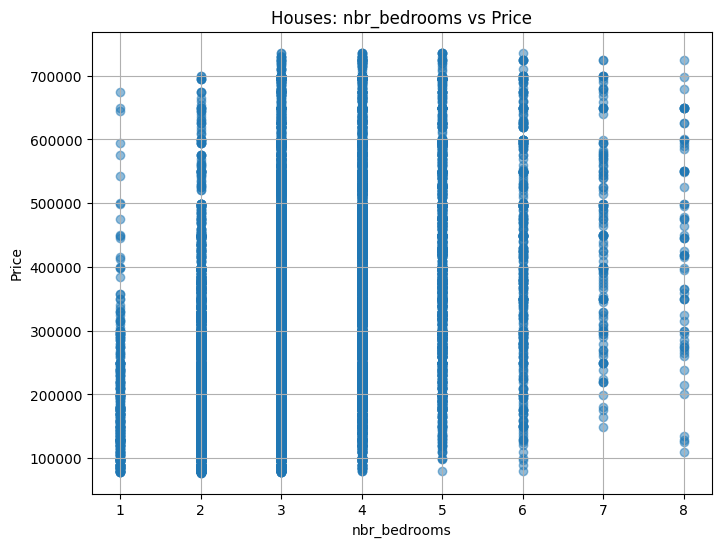

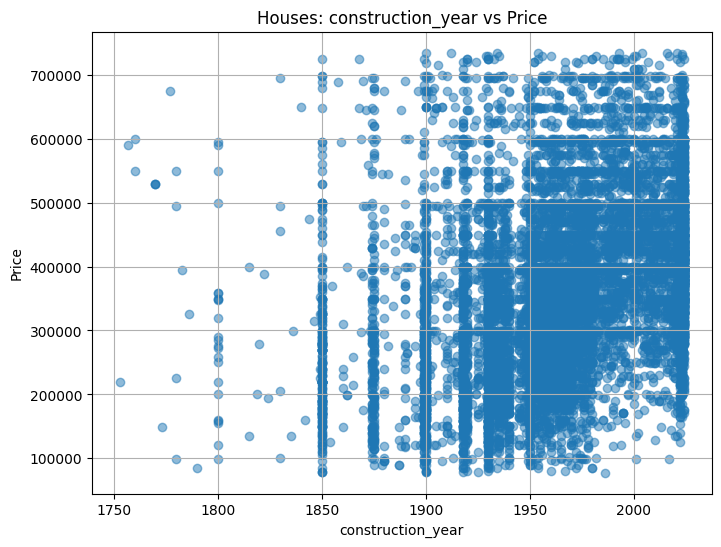


Scatter Plots for Apartments - High Correlation Features


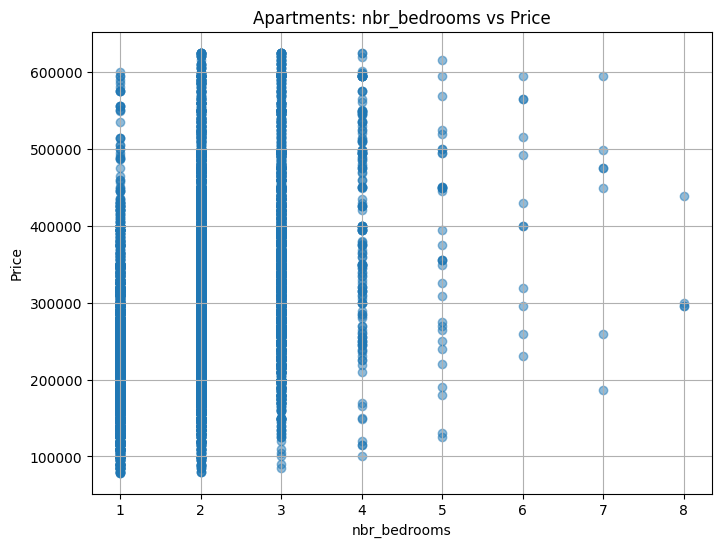

Feature Distributions for Houses


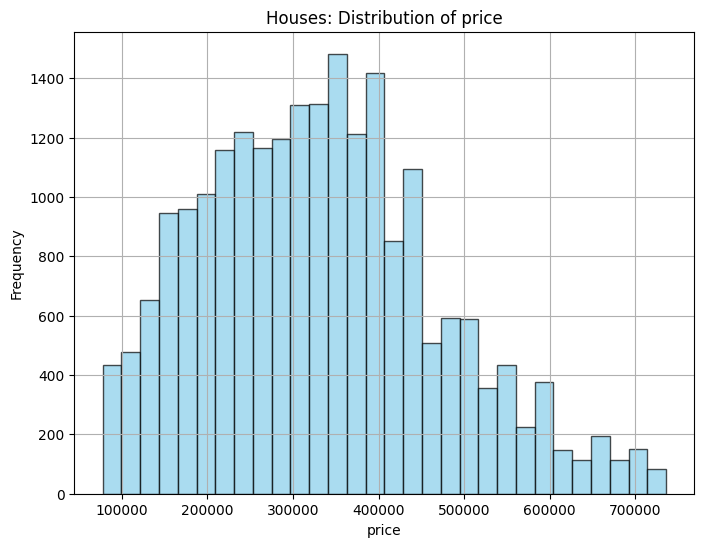

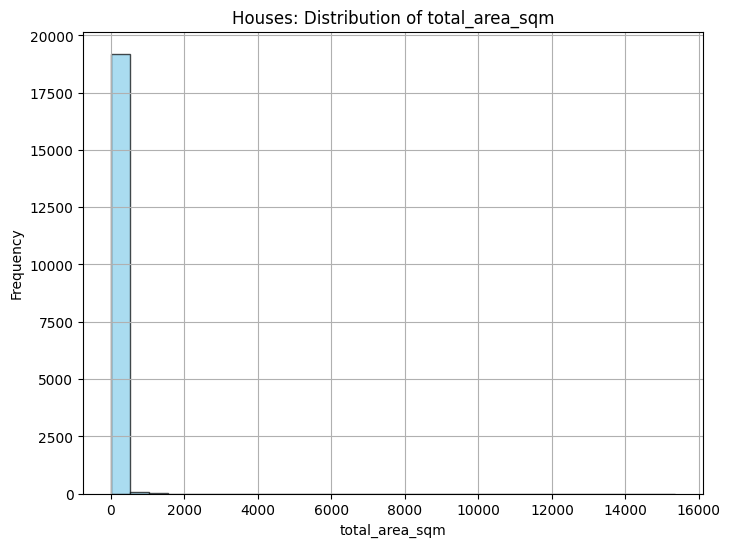

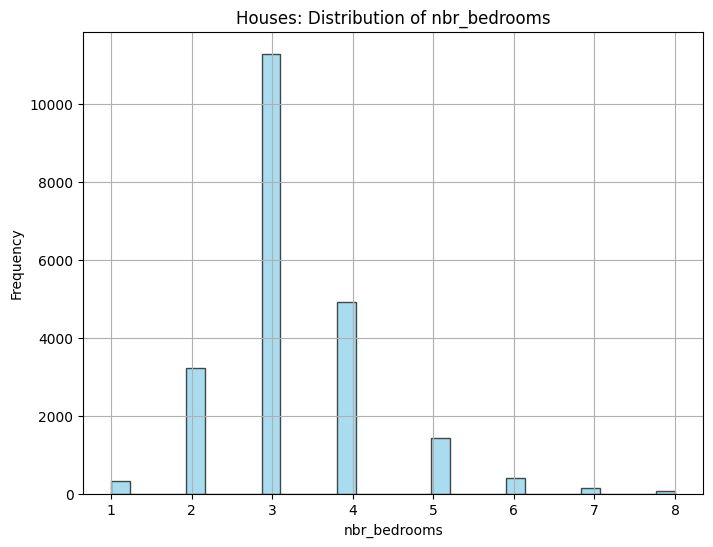

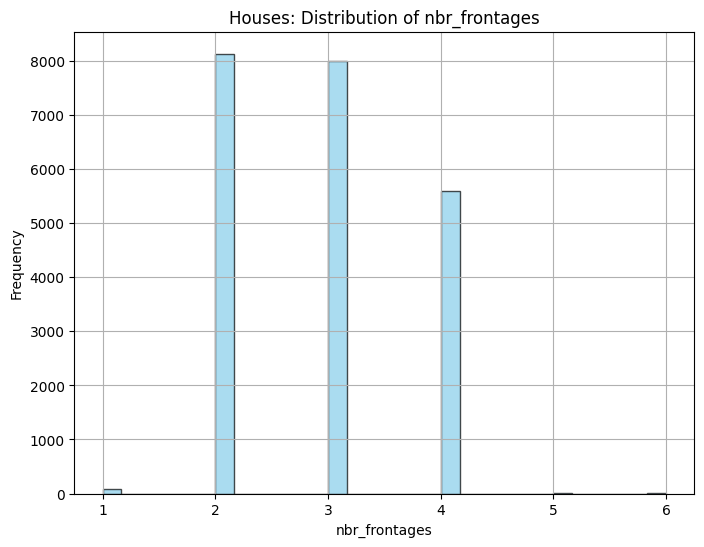

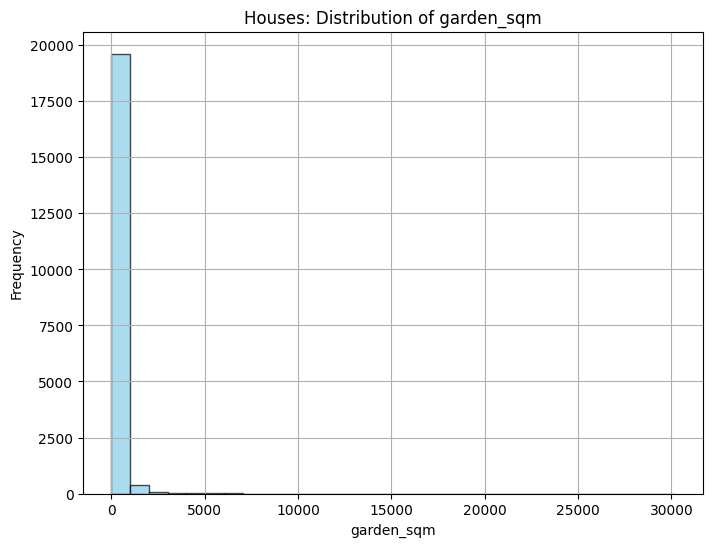

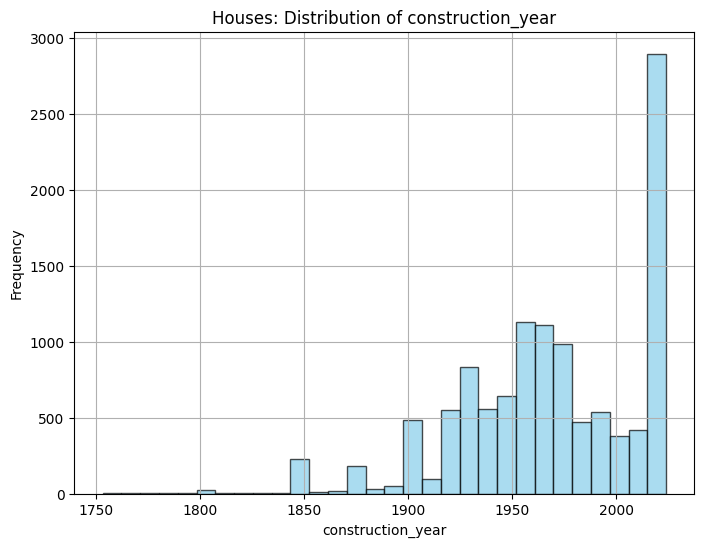

Feature Distributions for Apartments


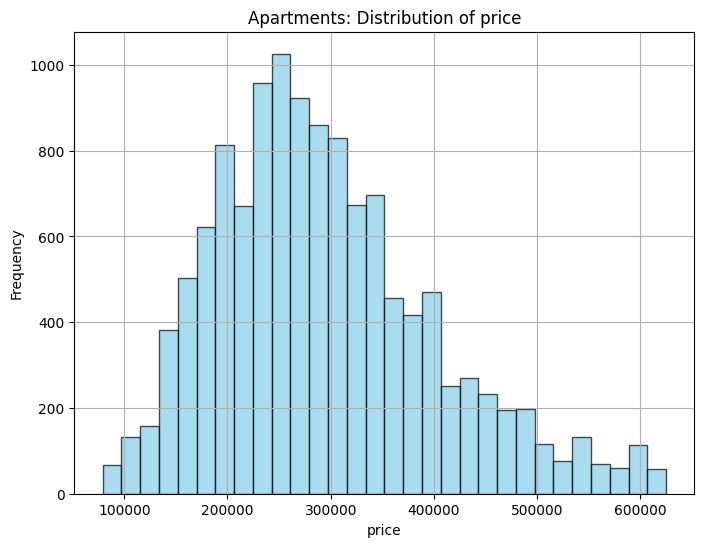

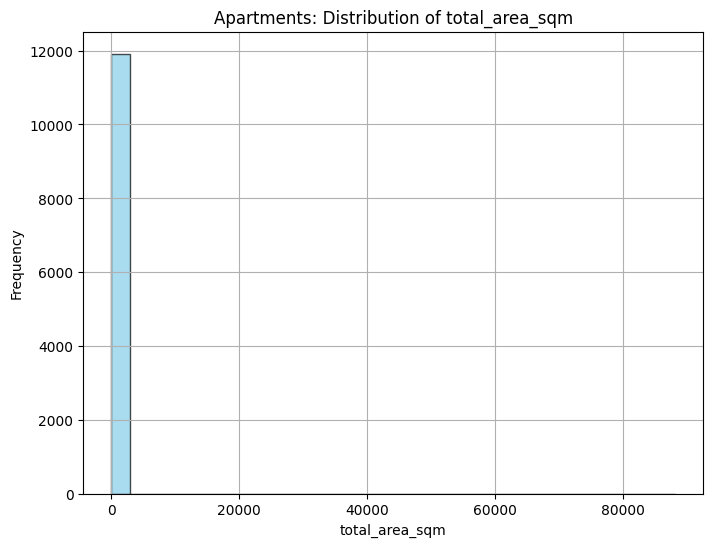

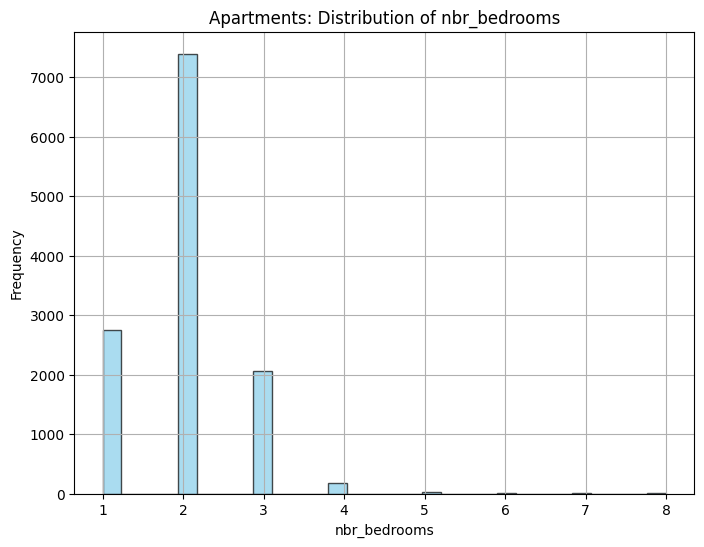

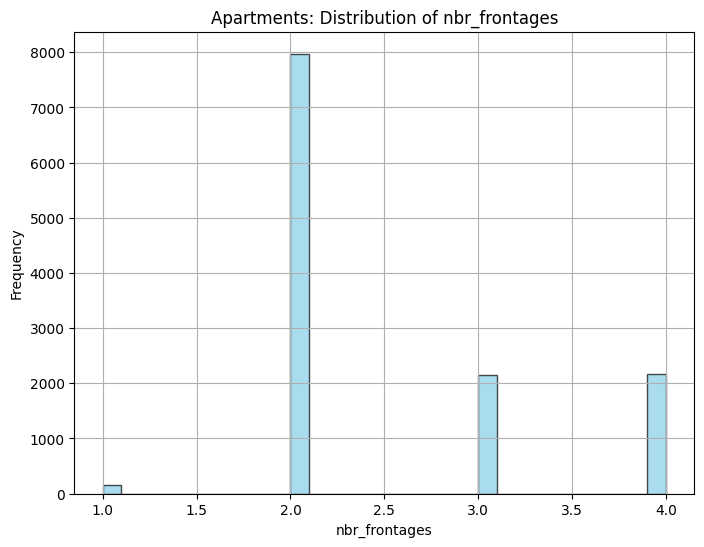

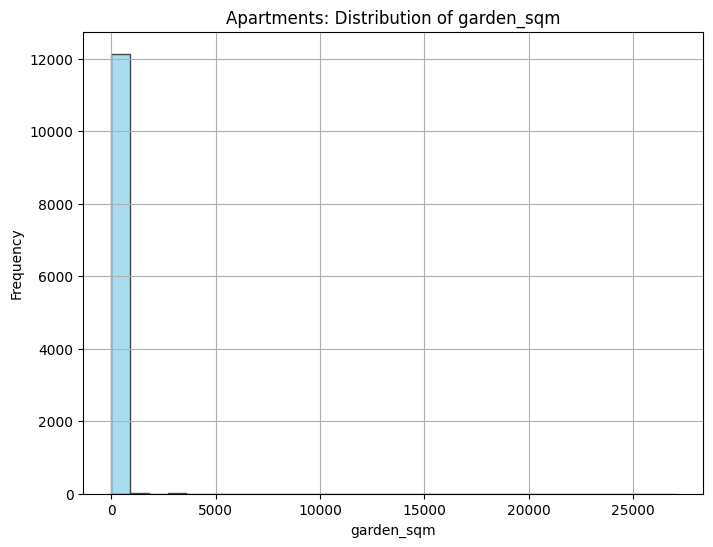

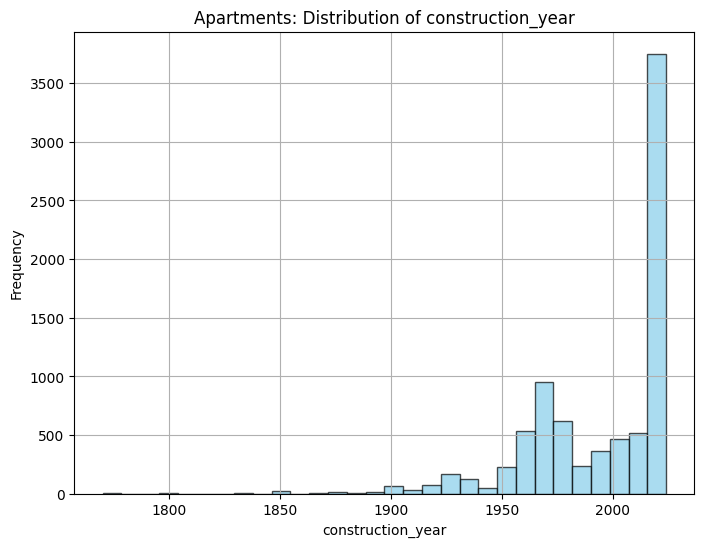

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (replace with actual file paths)
houses_data = pd.read_csv('houses_sqm.csv')
apartments_data = pd.read_csv('apartments_sqm.csv')

# Define the list of features to analyze
features_to_analyze = [
    "price", "total_area_sqm", "nbr_bedrooms", "nbr_frontages", 
    "garden_sqm", "construction_year"]


# Function to calculate and plot correlation matrix
def plot_correlation_matrix(data, dataset_name):
    correlation_matrix = data[features_to_analyze].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'{dataset_name} - Correlation Matrix')
    plt.show()

# Plot correlation matrices for both datasets
print("Correlation Matrix for Houses")
plot_correlation_matrix(houses_data, "Houses")

print("Correlation Matrix for Apartments")
plot_correlation_matrix(apartments_data, "Apartments")

# Identify highly correlated features with `price`
def get_high_corr_features(corr_matrix, target="price", threshold=0.3):
    return corr_matrix[target][(corr_matrix[target].abs() > threshold) & (corr_matrix[target].abs() < 1)].index.tolist()

# Scatter plots for high-correlation features against `price`
def plot_scatterplots(data, features, dataset_name):
    for feature in features:
        plt.figure(figsize=(8, 6))
        plt.scatter(data[feature], data['price'], alpha=0.5)
        plt.title(f'{dataset_name}: {feature} vs Price')
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.grid(True)
        plt.show()

# Plot scatterplots for houses and apartments
houses_corr_matrix = houses_data[features_to_analyze].corr()
apartments_corr_matrix = apartments_data[features_to_analyze].corr()

houses_high_corr_features = get_high_corr_features(houses_corr_matrix)
apartments_high_corr_features = get_high_corr_features(apartments_corr_matrix)

print("\nScatter Plots for Houses - High Correlation Features")
plot_scatterplots(houses_data, houses_high_corr_features, "Houses")

print("\nScatter Plots for Apartments - High Correlation Features")
plot_scatterplots(apartments_data, apartments_high_corr_features, "Apartments")

# Function to plot feature distributions
def plot_feature_distributions(data, dataset_name):
    for feature in features_to_analyze:
        if feature in data.columns and data[feature].notnull().any():
            plt.figure(figsize=(8, 6))
            plt.hist(data[feature].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
            plt.title(f'{dataset_name}: Distribution of {feature}')
            plt.xlabel(feature)
            plt.ylabel('Frequency')
            plt.grid(True)
            plt.show()

# Plot feature distributions for houses and apartments
print("Feature Distributions for Houses")
plot_feature_distributions(houses_data, "Houses")

print("Feature Distributions for Apartments")
plot_feature_distributions(apartments_data, "Apartments")


##Random Forest Model## 


Evaluating House Model with Random Forest using Cross-Validation

House Model Performance (Random Forest, Cross-Validation):
Mean R-squared Score (CV): 0.39880127
Standard Deviation of R-squared Score (CV): 0.02096586


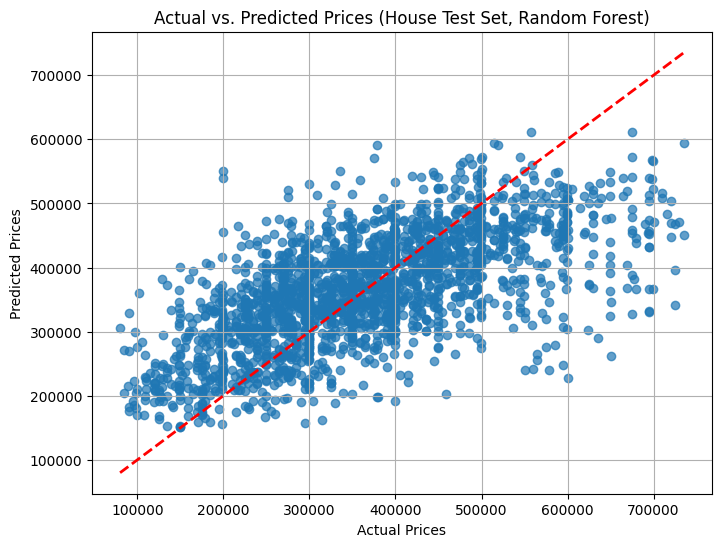


Evaluating Apartment Model with Random Forest using Cross-Validation

Apartment Model Performance (Random Forest, Cross-Validation):
Mean R-squared Score (CV): 0.41985115
Standard Deviation of R-squared Score (CV): 0.02308251


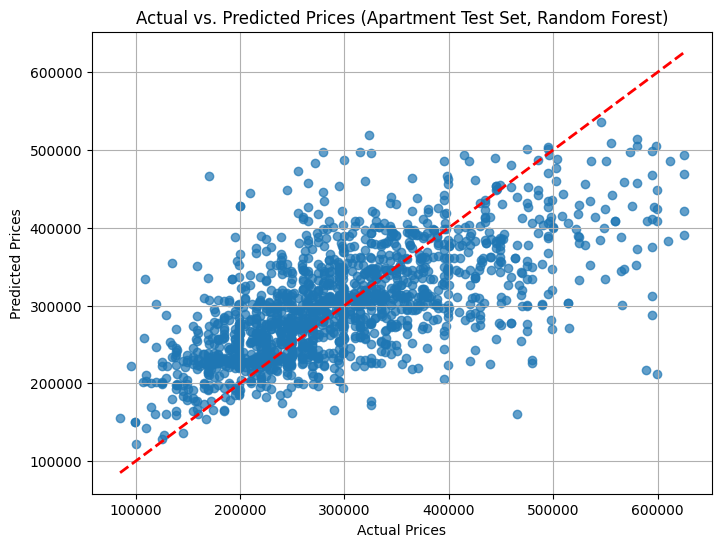

(np.float64(0.4198511459040083), np.float64(0.023082506823377317))

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import numpy as np
import matplotlib.pyplot as plt

# Load datasets (replace with your specific file paths)
houses_data = pd.read_csv('houses_sqm.csv')
apartments_data = pd.read_csv('apartments_sqm.csv')

# Define core features for houses and apartments
houses_features = ["price", "total_area_sqm", "construction_year", "nbr_bedrooms", "fl_furnished", 
                   "fl_terrace", "fl_double_glazing"]
apartments_features = ["price", "total_area_sqm", "construction_year", "nbr_bedrooms", "fl_terrace"]

# Filter data to keep only the core features and drop rows with missing values
houses_core = houses_data[houses_features].dropna()
apartments_core = apartments_data[apartments_features].dropna()

# Select features and preprocess data
selected_houses_features = ["total_area_sqm", "construction_year", "nbr_bedrooms", 
                             "fl_terrace", "fl_double_glazing"]
selected_apartments_features = ["total_area_sqm", "construction_year", "nbr_bedrooms", "fl_terrace"]

# Function to preprocess data
def preprocess_data(data, selected_features):
    return data[selected_features + ['price']].dropna()

houses_data_cleaned = preprocess_data(houses_data, selected_houses_features)
apartments_data_cleaned = preprocess_data(apartments_data, selected_apartments_features)

# Function to train and evaluate with cross-validation using Random Forest
def train_and_evaluate_with_rf_cv(data, features, target='price', model_type='Property'):
    if data.empty:
        print(f"No data available for {model_type.lower()}s.")
        return None
    
    # Separate features and target variable
    X = data[features]
    y = data[target]
    
    # Initialize the Random Forest Regressor
    rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
    
    # Set up cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Perform cross-validation and calculate mean R-squared score
    cv_scores = cross_val_score(rf_regressor, X, y, cv=cv, scoring='r2')
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    
    print(f"\n{model_type} Model Performance (Random Forest, Cross-Validation):")
    print(f"Mean R-squared Score (CV): {mean_cv_score:.8f}")
    print(f"Standard Deviation of R-squared Score (CV): {std_cv_score:.8f}")
    
    # Train-test split for visualization
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_regressor.fit(X_train, y_train)
    y_test_pred = rf_regressor.predict(X_test)
    
    # Plot actual vs. predicted values for the test set
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Ideal line
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs. Predicted Prices ({model_type} Test Set, Random Forest)')
    plt.grid(True)
    plt.show()
    
    return mean_cv_score, std_cv_score

# Evaluate Random Forest models for both houses and apartments
print("\nEvaluating House Model with Random Forest using Cross-Validation")
train_and_evaluate_with_rf_cv(houses_data_cleaned, selected_houses_features, model_type="House")

print("\nEvaluating Apartment Model with Random Forest using Cross-Validation")
train_and_evaluate_with_rf_cv(apartments_data_cleaned, selected_apartments_features, model_type="Apartment")
